In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import datetime
import pandas as pd

In [2]:
df = pd.read_csv('biblio.csv')

In [3]:
df = df.rename(columns={"Item Type": "Publication Type"})
df['Manual Tags'] = df['Manual Tags'].apply(lambda x: [tag.strip() for tag in x.split(';')] if isinstance(x, str) else [])
df['Publication Type'] = df['Publication Type'].replace('bookSection', 'Book Section').replace('conferencePaper', 'Conference Paper').replace('journalArticle', 'Journal Article')

In [4]:
biblio_df= df[["Publication Type","Publication Year","Author","Title","Publication Title","Conference Name","Manual Tags"]]

In [5]:
year_item_counts = df.groupby(['Publication Year', 'Publication Type']).size().unstack(fill_value=0)
year_item_counts_adjusted = year_item_counts.copy()
if 2024 in year_item_counts_adjusted.index:
    year_item_counts_adjusted.loc[2024] = np.round(year_item_counts_adjusted.loc[2024] * 365/334) #1-DEC

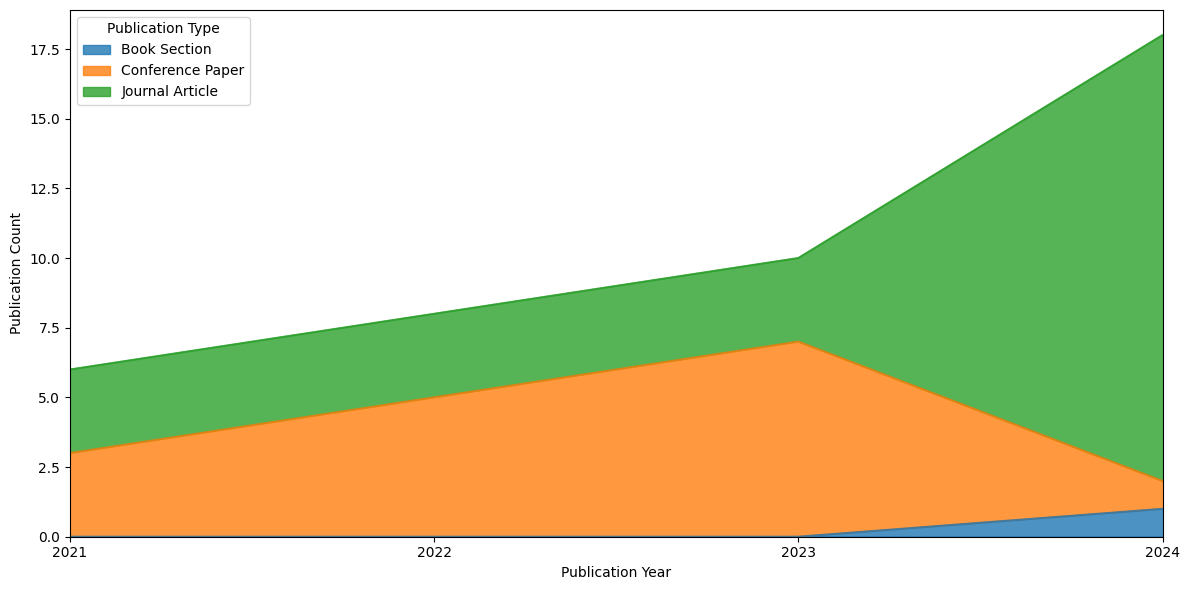

In [6]:
year_item_counts_adjusted.plot(kind='area', stacked=True, alpha=0.8, figsize=(12, 6))
plt.xlabel('Publication Year')
plt.ylabel('Publication Count')
plt.xlim(2021, 2024)
plt.xticks(range(2021, 2025,1))
plt.legend(title='Publication Type')
plt.tight_layout()
plt.show();

The previous cells are similar to notebook provided. The following is to utilize manual tags that were added
* **Detrimental content** - topic being identified
* **ML Method** - machine learning method used
* **XAI** - Explainable AI Local Model-Agnostic Methods used

In [7]:
type(biblio_df['Manual Tags'][0])

list

In [8]:
biblio_df['Manual Tags'][0]

['Deep learning',
 'Learning algorithms',
 'Natural language processing systems',
 'BERT',
 'Bidirectional encoder representation from transformer',
 'Condition',
 'COVID-19',
 'Distilbert',
 'DistilBERT',
 'Misinformation detection',
 'Natural languages',
 'Performance',
 'SHAP',
 'Shapley',
 'Shapley additive explanation',
 'Trust',
 'manual_BERT',
 'manual_SHAP',
 'manual_misinformation']

In [9]:
biblio_df.dtypes

Publication Type     object
Publication Year      int64
Author               object
Title                object
Publication Title    object
Conference Name      object
Manual Tags          object
dtype: object

In [17]:
def remove_manual_prefix(tag):
    if tag.startswith("manual_"):
        return tag[7:]  # Remove "manual_" from the beginning
    return None  # Exclude tags that don't start with "manual_"

# Create a new column with processed tags
biblio_df['Tags'] = biblio_df['Manual Tags'].apply(
    lambda tags: [remove_manual_prefix(tag) for tag in tags if remove_manual_prefix(tag) is not None]
)

/tmp/ipykernel_29065/1686250814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biblio_df['Tags'] = biblio_df['Manual Tags'].apply(


In [18]:
biblio_df['Tags']

0                          [BERT, SHAP, misinformation]
1                                   [LSTM, LIME, troll]
2                               [LSTM, LIME, fake_news]
3                                    [BERT, LIME, hate]
4                                 [SHAP, XGBoost, hate]
5                             [BERT, SHAP, controversy]
6                                    [LSTM, LIME, hate]
7                                [LIME, fake_news, SVM]
8                            [SHAP, BERT_w_CNN, sexism]
9                                    [BERT, LIME, hate]
10                   [BERT, BERT_w_CNN, hate, FAST-RNN]
11                              [SHAP, sexism, XGBoost]
12                                    [BERT, fake_news]
13                [SHAP, misinformation, random_forest]
14                                  [LIME, hate, mBERT]
15       [LSTM, LIME_w_integrated_gradients, CNN, hate]
16                                   [BERT, LIME, hate]
17                                   [LIME, CNN,